In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Simple Stock Price Prediction with LSTM in Keras

## 1. Training Data Preprocessing

In [0]:
# Importing the dependencies

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
# Loading the training dataset

dataset_train = pd.read_csv('/content/gdrive/My Drive/deeplearing/documents/week5/Google_Stock_Price_Train.csv')

In [0]:
# Showing the first 3 rows of dataset

dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [0]:
# Checking variables info

dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.0+ KB


In [0]:
# Slicing the training set 
"""
If we use dataset_train.iloc[:, 1].values instead, it will give us 1 dimensional array. 

     df = dataset_train.iloc[:, 1].values
     print("Dimensions of df:{} & shape:{}".format( df.ndim, df.shape ))

O/P: Dimensions of df:1 & shape:(1258,)

But next scalling function expects the object to be as a matrix of rows and columns.

"""
training_set = dataset_train.iloc[:, 1:2].values

print("Dimensions of training_set:{} & shape:{}".format( training_set.ndim, training_set.shape ))

Dimensions of training_set:2 & shape:(1258, 1)


In [0]:
# Normalizing the training set(scalling in range of 0 to 1)

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Constructing the training set

X_train = []
y_train = []

# Define the the time step size
time_step = 60
for i in range(time_step, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-time_step:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print("Dimensions of X_train:{} & shape:{}".format( X_train.ndim, X_train.shape ))

Dimensions of X_train:2 & shape:(1198, 60)


In [0]:
# Adding 1 more dimension to X_train as LSTM layers expects it`s inputs to be of 3 dimensions
"""
3 Dimensions are:
  1st : Sample of inputs
  2nd : Time steps (here we have taken 60 timesteps in single consideration)
  3rd : number of features (here it`s 1 as we are dealing with only 'Open' column)

"""
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Dimensions of X_train:{} & shape:{}".format( X_train.ndim, X_train.shape ))

Dimensions of X_train:3 & shape:(1198, 60, 1)


##2. Model Building

In [0]:
# Importing the model dependencies

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Initializing the sequential model of Keras

regressor = Sequential()

W0723 16:18:02.259157 139832105531264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
# Adding 1st LSTM layer & dropout layer where input shape details(Time step & number of features) has to be mentioned

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

W0723 16:18:02.305189 139832105531264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 16:18:02.315176 139832105531264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 16:18:02.579873 139832105531264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 16:18:02.594267 139832105531264 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
# Adding 2nd LSTM layer & dropout layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding 3rd LSTM layer & dropout layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding 4th LSTM layer & dropout layer

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
# Adding final output layer

regressor.add(Dense(units = 1))

In [0]:
# Compiling the sequential model

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

W0723 16:18:03.461133 139832105531264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# Showing the model details

print(regressor.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [0]:
# Saving the image of model structure

from keras.utils import plot_model
plot_model(regressor, to_file='LSTM_model_Google_stock.png', show_shapes=True, show_layer_names=True)

##3. Model Training

In [0]:
# Fitting the model with training data

fitting_metadata = regressor.fit(X_train, y_train, epochs =100 , batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014 - acc: 0.0017
Epoch 11/100
1198/1

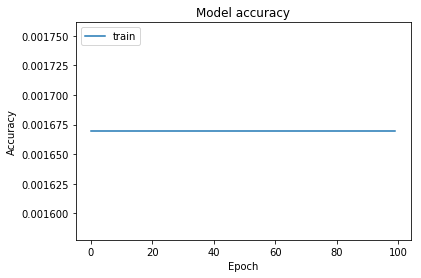

In [0]:
# Summarizing the history for accuracy

plt.plot(fitting_metadata.history['acc'])
#plt.plot(fitting_metadata.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

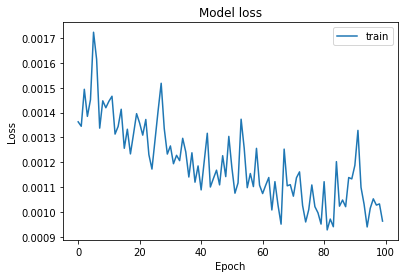

In [0]:
# Summarize the history for loss

plt.plot(fitting_metadata.history['loss'])
#plt.plot(fitting_metadata.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## 4. Test Data Preprocessing

In [0]:
# Loading the test dataset 

dataset_test = pd.read_csv('/content/gdrive/My Drive/deeplearing/documents/week5/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Slicing the test set

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
test_set = dataset_total[len(dataset_total) - len(dataset_test) - time_step:].values
print("Dimensions of test_set:{} & shape:{}".format( test_set.ndim, test_set.shape ))

Dimensions of test_set:1 & shape:(80,)


In [0]:
# Reshaping the test data
'''
As our scalling function expects the object to be as a matrix of rows and columns

'''

test_set = test_set.reshape(-1,1)
print("Dimensions of test_set:{} & shape:{}".format( test_set.ndim, test_set.shape ))

Dimensions of test_set:2 & shape:(80, 1)


In [0]:
# Normalizing the test set

test_set_scalled = sc.transform(test_set)

In [0]:
# Constructing the test set

X_test = []
for i in range(time_step, test_set.shape[0]):
    X_test.append(test_set_scalled[i-time_step:i, 0])
X_test = np.array(X_test)

print("Dimensions of X_test:{} & shape:{}".format( X_test.ndim, X_test.shape ))

Dimensions of X_test:2 & shape:(20, 60)


In [0]:
# Making X_test 3 dimensional to be expected as input of LSTM layers

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("Dimensions of X_test:{} & shape:{}".format( X_test.ndim, X_test.shape ))

Dimensions of X_test:3 & shape:(20, 60, 1)


## 5. Predicting

In [0]:
# Predicting with test data

predicted_stock_price = regressor.predict(X_test)

In [0]:
# Reverse scalling of predicted data

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

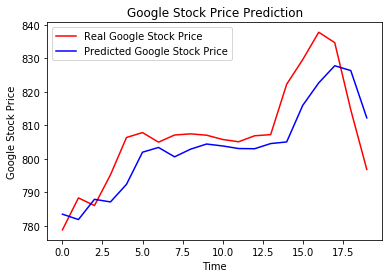

In [0]:
# Plotting the predicted data

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()